## 知識情報学 第3回演習サンプルプログラム ex3.ipynb
- Programmed by Nattapong Thammasan, 監修　福井健一
- Last updated: 2019/10/14
- Checked with Python 3.8.8, scikit-learn 1.0
- MIT License

## 決定木学習による識別と決定木の描画
- 要scikit-learn 0.21以降

In [10]:
%matplotlib inline
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

In [2]:
# テストデータの割合
test_proportion = 0.3
# Iris データセットをロード  
iris = datasets.load_iris()
# 特徴ベクトルを取得
X = iris.data
# クラスラベルを取得
y = iris.target

In [3]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_proportion, random_state = 1)

In [4]:
# エントロピーを指標とする決定木のインスタンスを生成し，決定木のモデルに学習データを適合させる
tree= DecisionTreeClassifier(criterion='entropy', max_depth=2)
trained_model = tree.fit(X_train, y_train)

### 得られた決定木の描画

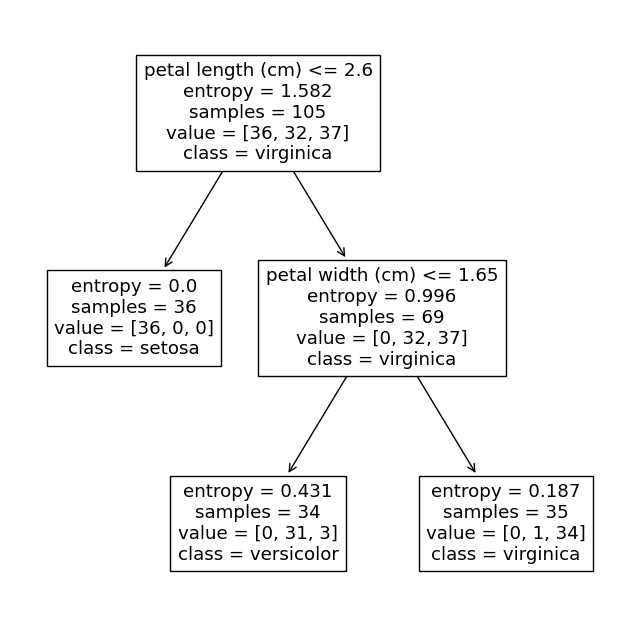

In [5]:
plt.figure(figsize=[8,8])
plot_tree(trained_model, feature_names=iris.feature_names, class_names=list(iris.target_names))
plt.show()

### 課題1(a) 学習した決定木を用いて学習データおよびテストデータのクラスを予測し，結果をy_train_predicted, y_test_predictedに格納する
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

In [6]:
y_train_predicted = trained_model.predict(X_train)
y_test_predicted = trained_model.predict(X_test)

In [7]:
# テストデータの正解クラスと決定木による予測クラスを出力
print("Test Data")
print("True Label     ", y_test)
print("Predicted Label", y_test_predicted)

Test Data
True Label      [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Predicted Label [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


### 課題1(b) 関数precision_recall_fscore_supportを使用して，学習データおよびテストデータに対するprecision，recall，F値の算出しfscore_train, fscore_testに格納する

In [8]:
fscore_train = precision_recall_fscore_support(y_train, y_train_predicted)
fscore_test = precision_recall_fscore_support(y_test, y_test_predicted)

### 平均precision, recall, F値

In [9]:
print('Training data')
print('Class 0 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_train[0][0], fscore_train[1][0], fscore_train[2][0]))
print('Class 1 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_train[0][1], fscore_train[1][1], fscore_train[2][1]))
print('Class 2 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_train[0][2], fscore_train[1][2], fscore_train[2][2]))
print('Average Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (np.average(fscore_train[0]), np.average(fscore_train[1]), np.average(fscore_train[2])))

print('Test data')
print('Class 0 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_test[0][0], fscore_test[1][0], fscore_test[2][0]))
print('Class 1 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_test[0][1], fscore_test[1][1], fscore_test[2][1]))
print('Class 2 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_test[0][2], fscore_test[1][2], fscore_test[2][2]))
print('Average Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (np.average(fscore_test[0]), np.average(fscore_test[1]), np.average(fscore_test[2])))

Training data
Class 0 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 1 Precision: 0.912, Recall: 0.969, Fscore: 0.939
Class 2 Precision: 0.971, Recall: 0.919, Fscore: 0.944
Average Precision: 0.961, Recall: 0.963, Fscore: 0.961
Test data
Class 0 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 1 Precision: 0.944, Recall: 0.944, Fscore: 0.944
Class 2 Precision: 0.923, Recall: 0.923, Fscore: 0.923
Average Precision: 0.956, Recall: 0.956, Fscore: 0.956


### 課題(c) 10 fold cross-validation を行い，最大深さを変化させたときの学習データおよびテストデータに対する平均Accuracyを算出し，グラフにプロットしなさい
- model_selection.cross_validateを使用すると良い
  - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

# 考察
max_depthを増加させるとtrain dataの各種scoreは改善し、max_depth=6あたりで100%ととなった。しかし、test scoreに改善は見られなかった。max_depth=2の時点でscoreは十分高い値を示しており、max_depthを増加させることは過学習を招いただけだと思われる。tree構造を可視化すると、depth=4の時点で全ての葉のエントロピーが0になっており、木の複雑さはすでに最大限まで達していることがわかった。

# 追加の工夫
- accurcyだけでなくprecision, recall, f1値も計算して考察した
- 木の構造を可視化して考察した

In [42]:
# cross validation
max_depth_list, train_acc_list, test_acc_list, train_prec_list, test_prec_list, train_rec_list, test_rec_list, train_f_list, test_f_list = [], [], [], [], [], [], [], [], []
for max_depth in range(2, 17):
    tree= DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    cv_result = cross_validate(tree, X, y, cv=10, return_train_score=True, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
    max_depth_list.append(max_depth)
    train_acc_list.append(np.average(cv_result['train_accuracy']))
    test_acc_list.append(np.average(cv_result['test_accuracy']))
    train_prec_list.append(np.average(cv_result['train_precision_macro']))
    test_prec_list.append(np.average(cv_result['test_precision_macro']))
    train_rec_list.append(np.average(cv_result['train_recall_macro']))
    test_rec_list.append(np.average(cv_result['test_recall_macro']))
    train_f_list.append(np.average(cv_result['train_f1_macro']))
    test_f_list.append(np.average(cv_result['test_f1_macro']))

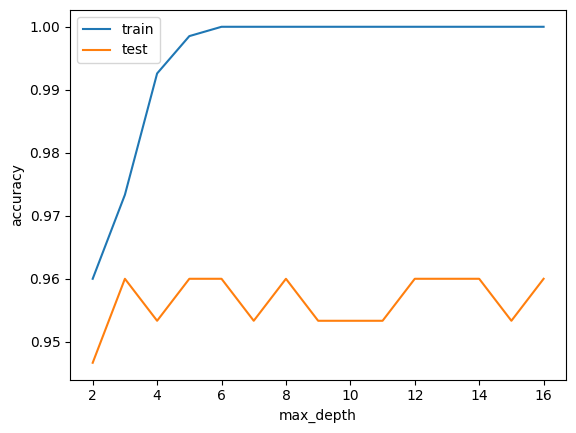

In [43]:
# accuracy
plt.plot(max_depth_list, train_acc_list, label='train')
plt.plot(max_depth_list, test_acc_list, label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

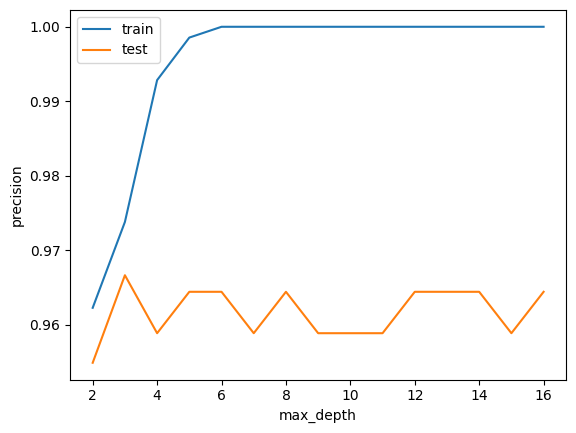

In [44]:
# precision
plt.plot(max_depth_list, train_prec_list, label='train')
plt.plot(max_depth_list, test_prec_list, label='test')
plt.xlabel('max_depth')
plt.ylabel('precision')
plt.legend()
plt.show()

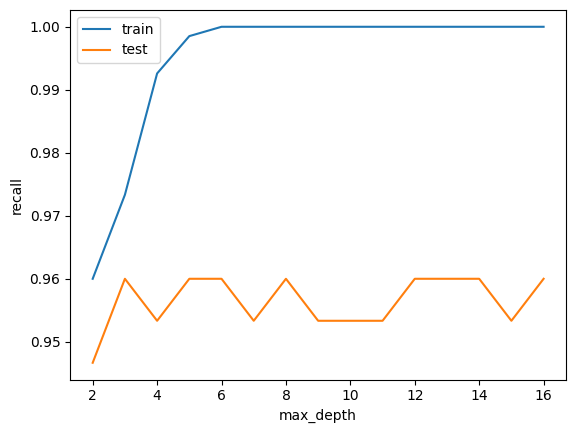

In [45]:
# recall
plt.plot(max_depth_list, train_rec_list, label='train')
plt.plot(max_depth_list, test_rec_list, label='test')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()
plt.show()

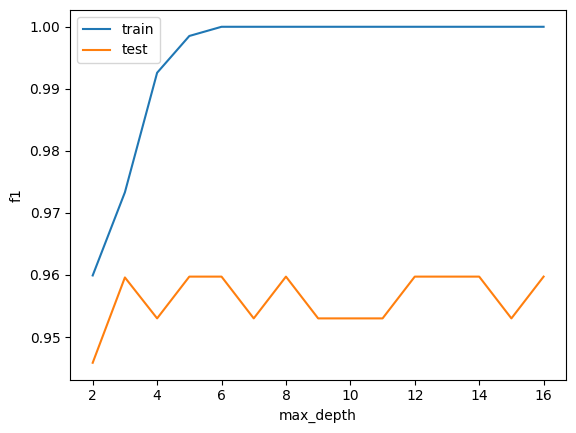

In [46]:
# f1
plt.plot(max_depth_list, train_f_list, label='train')
plt.plot(max_depth_list, test_f_list, label='test')
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.legend()
plt.show()

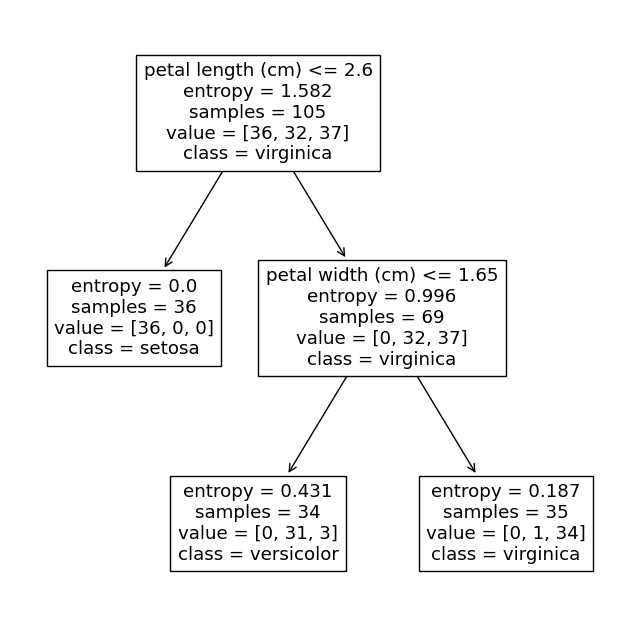

In [48]:
tree= DecisionTreeClassifier(criterion='entropy', max_depth=2)
trained_model = tree.fit(X_train, y_train)
plt.figure(figsize=[8,8])
plot_tree(trained_model, feature_names=iris.feature_names, class_names=list(iris.target_names))
plt.show()

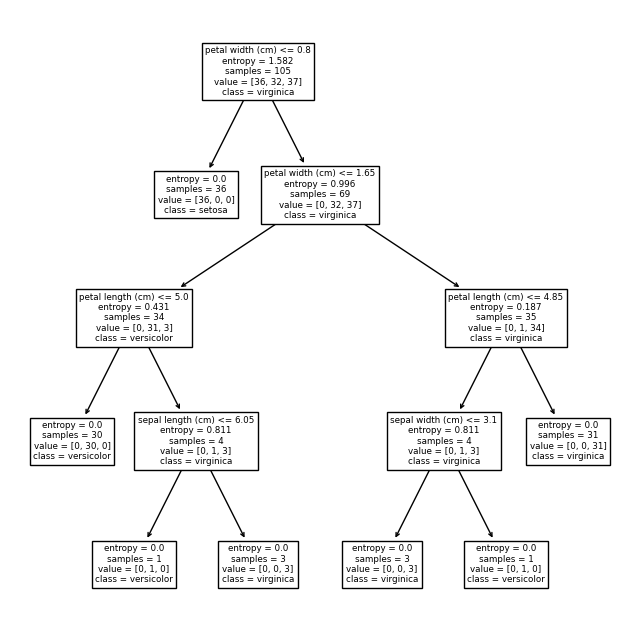

In [49]:
tree= DecisionTreeClassifier(criterion='entropy', max_depth=5)
trained_model = tree.fit(X_train, y_train)
plt.figure(figsize=[8,8])
plot_tree(trained_model, feature_names=iris.feature_names, class_names=list(iris.target_names))
plt.show()

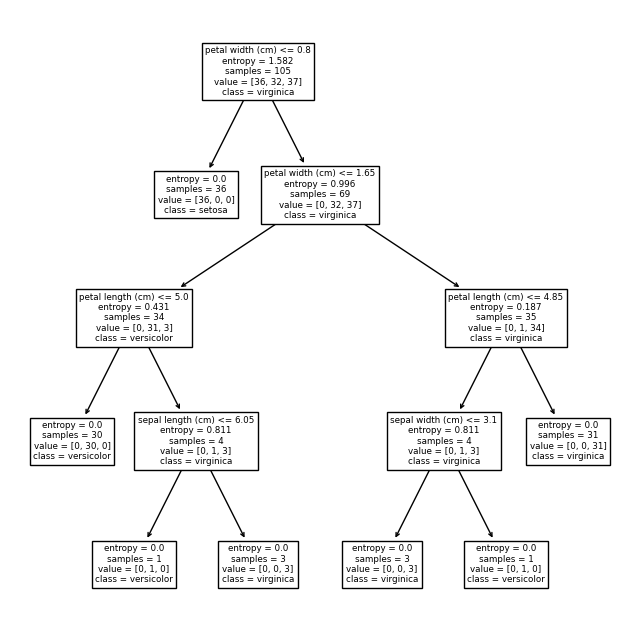

In [50]:
tree= DecisionTreeClassifier(criterion='entropy', max_depth=16)
trained_model = tree.fit(X_train, y_train)
plt.figure(figsize=[8,8])
plot_tree(trained_model, feature_names=iris.feature_names, class_names=list(iris.target_names))
plt.show()